<a href="https://colab.research.google.com/github/AleksanderPiasecki/MetodyISystSterProdukcja/blob/main/exercise_categorical_variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This notebook is an exercise in the [Intermediate Machine Learning](https://www.kaggle.com/learn/intermediate-machine-learning) course.  You can reference the tutorial at [this link](https://www.kaggle.com/alexisbcook/categorical-variables).**

---


By encoding **categorical variables**, you'll obtain your best results thus far!

# Setup

The questions below will give you feedback on your work. Run the following cell to set up the feedback system.

In [ ]:
# Set up code checking
import os
if not os.path.exists("../input/train.csv"):
    os.symlink("../input/home-data-for-ml-course/train.csv", "../input/train.csv")  
    os.symlink("../input/home-data-for-ml-course/test.csv", "../input/test.csv") 
from learntools.core import binder
binder.bind(globals())
from learntools.ml_intermediate.ex3 import *
print("Setup Complete")

Setup Complete


In this exercise, you will work with data from the [Housing Prices Competition for Kaggle Learn Users](https://www.kaggle.com/c/home-data-for-ml-course). 

![Ames Housing dataset image](https://i.imgur.com/lTJVG4e.png)

Run the next code cell without changes to load the training and validation sets in `X_train`, `X_valid`, `y_train`, and `y_valid`.  The test set is loaded in `X_test`.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Read the data
X = pd.read_csv('../input/train.csv', index_col='Id') 

# Remove rows with missing target, separate target from predictors
X.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = X.SalePrice
X.drop(['SalePrice'], axis=1, inplace=True)

# To keep things simple, we'll drop columns with missing values
cols_with_missing = [col for col in X.columns if X[col].isnull().any()] 
X.drop(cols_with_missing, axis=1, inplace=True)

# Break off validation set from training data
X_train, X_valid, y_train, y_valid = train_test_split(X, y,
                                                      train_size=0.8, test_size=0.2,
                                                      random_state=0)

Use the next code cell to print the first five rows of the data.

In [ ]:
X_train.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
619,20,RL,11694,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,...,108,0,0,260,0,0,7,2007,New,Partial
871,20,RL,6600,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,0,0,0,0,0,0,8,2009,WD,Normal
93,30,RL,13360,Pave,IR1,HLS,AllPub,Inside,Gtl,Crawfor,...,0,44,0,0,0,0,8,2009,WD,Normal
818,20,RL,13265,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,...,59,0,0,0,0,0,7,2008,WD,Normal
303,20,RL,13704,Pave,IR1,Lvl,AllPub,Corner,Gtl,CollgCr,...,81,0,0,0,0,0,1,2006,WD,Normal


Notice that the dataset contains both numerical and categorical variables.  You'll need to encode the categorical data before training a model.

To compare different models, you'll use the same `score_dataset()` function from the tutorial.  This function reports the [mean absolute error](https://en.wikipedia.org/wiki/Mean_absolute_error) (MAE) from a random forest model.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# function for comparing different approaches
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = RandomForestRegressor(n_estimators=100, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

# Step 1: Drop columns with categorical data

You'll get started with the most straightforward approach.  Use the code cell below to preprocess the data in `X_train` and `X_valid` to remove columns with categorical data.  Set the preprocessed DataFrames to `drop_X_train` and `drop_X_valid`, respectively.  

In [ ]:
# Fill in the lines below: drop columns in training and validation data
drop_X_train = X_train.select_dtypes(exclude=['object'])
drop_X_valid = X_valid.select_dtypes(exclude=['object'])
# Check your answers
step_1.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [ ]:
# Lines below will give you a hint or solution code
#step_1.hint()
#step_1.solution()

Run the next code cell to get the MAE for this approach.

In [ ]:
print("MAE from Approach 1 (Drop categorical variables):")
print(score_dataset(drop_X_train, drop_X_valid, y_train, y_valid))

MAE from Approach 1 (Drop categorical variables):
17837.82570776256


Before jumping into label encoding, we'll investigate the dataset.  Specifically, we'll look at the `'Condition2'` column.  The code cell below prints the unique entries in both the training and validation sets.

In [ ]:
print("Unique values in 'Condition2' column in training data:", X_train['Condition2'].unique())
print("\nUnique values in 'Condition2' column in validation data:", X_valid['Condition2'].unique())

Unique values in 'Condition2' column in training data: ['Norm' 'PosA' 'Feedr' 'PosN' 'Artery' 'RRAe']

Unique values in 'Condition2' column in validation data: ['Norm' 'RRAn' 'RRNn' 'Artery' 'Feedr' 'PosN']


# Step 2: Label encoding

### Part A

If you now write code to: 
- fit a label encoder to the training data, and then 
- use it to transform both the training and validation data, 

you'll get an error.  Can you see why this is the case?  (_You'll need  to use the above output to answer this question._)

In [ ]:
# Check your answer (Run this code cell to receive credit!)
step_2.a.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct:</span> 

Fitting a label encoder to a column in the training data creates a corresponding integer-valued label for each unique value **that appears in the training data**. In the case that the validation data contains values that don't also appear in the training data, the encoder will throw an error, because these values won't have an integer assigned to them.  Notice that the `'Condition2'` column in the validation data contains the values `'RRAn'` and `'RRNn'`, but these don't appear in the training data -- thus, if we try to use a label encoder with scikit-learn, the code will throw an error.

In [ ]:
#step_2.a.hint()

This is a common problem that you'll encounter with real-world data, and there are many approaches to fixing this issue.  For instance, you can write a custom label encoder to deal with new categories.  The simplest approach, however, is to drop the problematic categorical columns.  

Run the code cell below to save the problematic columns to a Python list `bad_label_cols`.  Likewise, columns that can be safely label encoded are stored in `good_label_cols`.

In [ ]:
# All categorical columns
object_cols = [col for col in X_train.columns if X_train[col].dtype == "object"]

# Columns that can be safely label encoded
good_label_cols = [col for col in object_cols if 
                   set(X_train[col]) == set(X_valid[col])]
        
# Problematic columns that will be dropped from the dataset
bad_label_cols = list(set(object_cols)-set(good_label_cols))
        
print('Categorical columns that will be label encoded:', good_label_cols)
print('\nCategorical columns that will be dropped from the dataset:', bad_label_cols)

Categorical columns that will be label encoded: ['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'BldgType', 'HouseStyle', 'ExterQual', 'CentralAir', 'KitchenQual', 'PavedDrive', 'SaleCondition']

Categorical columns that will be dropped from the dataset: ['RoofMatl', 'Functional', 'Foundation', 'SaleType', 'Utilities', 'Condition1', 'ExterCond', 'Condition2', 'HeatingQC', 'LandSlope', 'RoofStyle', 'Heating', 'Neighborhood', 'Exterior2nd', 'Exterior1st']


### Part B

Use the next code cell to label encode the data in `X_train` and `X_valid`.  Set the preprocessed DataFrames to `label_X_train` and `label_X_valid`, respectively.  
- We have provided code below to drop the categorical columns in `bad_label_cols` from the dataset. 
- You should label encode the categorical columns in `good_label_cols`.  

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Drop categorical columns that will not be encoded
label_X_train = X_train.drop(bad_label_cols, axis=1)
label_X_valid = X_valid.drop(bad_label_cols, axis=1)

# Apply label encoder 
label_encoder = LabelEncoder() # Your code here
for col in good_label_cols:
    label_X_train[col] = label_encoder.fit_transform(label_X_train[col])
    label_X_valid[col] = label_encoder.transform(label_X_valid[col])

# Check your answer
step_2.b.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [ ]:
# Lines below will give you a hint or solution code
#step_2.b.hint()
#step_2.b.solution()

Run the next code cell to get the MAE for this approach.

In [ ]:
print("MAE from Approach 2 (Label Encoding):") 
print(score_dataset(label_X_train, label_X_valid, y_train, y_valid))

MAE from Approach 2 (Label Encoding):
17575.291883561644


So far, you've tried two different approaches to dealing with categorical variables.  And, you've seen that encoding categorical data yields better results than removing columns from the dataset.

Soon, you'll try one-hot encoding.  Before then, there's one additional topic we need to cover.  Begin by running the next code cell without changes.  

In [ ]:
# Get number of unique entries in each column with categorical data
object_nunique = list(map(lambda col: X_train[col].nunique(), object_cols))
d = dict(zip(object_cols, object_nunique))
# Print number of unique entries by column, in ascending order
sorted(d.items(), key=lambda x: x[1])

[('Street', 2),
 ('Utilities', 2),
 ('CentralAir', 2),
 ('LandSlope', 3),
 ('PavedDrive', 3),
 ('LotShape', 4),
 ('LandContour', 4),
 ('ExterQual', 4),
 ('KitchenQual', 4),
 ('MSZoning', 5),
 ('LotConfig', 5),
 ('BldgType', 5),
 ('ExterCond', 5),
 ('HeatingQC', 5),
 ('Condition2', 6),
 ('RoofStyle', 6),
 ('Foundation', 6),
 ('Heating', 6),
 ('Functional', 6),
 ('SaleCondition', 6),
 ('RoofMatl', 7),
 ('HouseStyle', 8),
 ('Condition1', 9),
 ('SaleType', 9),
 ('Exterior1st', 15),
 ('Exterior2nd', 16),
 ('Neighborhood', 25)]

# Step 3: Investigating cardinality

### Part A

The output above shows, for each column with categorical data, the number of unique values in the column.  For instance, the `'Street'` column in the training data has two unique values: `'Grvl'` and `'Pave'`, corresponding to a gravel road and a paved road, respectively.

We refer to the number of unique entries of a categorical variable as the **cardinality** of that categorical variable.  For instance, the `'Street'` variable has cardinality 2.

Use the output above to answer the questions below.

In [ ]:
# Fill in the line below: How many categorical variables in the training data
# have cardinality greater than 10?
high_cardinality_numcols = len([cat[0] for cat in d.items() if cat[1] > 10])
print(high_cardinality_numcols)
# Fill in the line below: How many columns are needed to one-hot encode the 
# 'Neighborhood' variable in the training data?

num_cols_neighborhood = 25

# Check your answers
step_3.a.check()

3


<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [ ]:
# Lines below will give you a hint or solution code
#step_3.a.hint()
#step_3.a.solution()

### Part B

For large datasets with many rows, one-hot encoding can greatly expand the size of the dataset.  For this reason, we typically will only one-hot encode columns with relatively low cardinality.  Then, high cardinality columns can either be dropped from the dataset, or we can use label encoding.

As an example, consider a dataset with 10,000 rows, and containing one categorical column with 100 unique entries.  
- If this column is replaced with the corresponding one-hot encoding, how many entries are added to the dataset?  
- If we instead replace the column with the label encoding, how many entries are added?  

Use your answers to fill in the lines below.

In [ ]:
# Fill in the line below: How many entries are added to the dataset by 
# replacing the column with a one-hot encoding?
OH_entries_added = 990000

# Fill in the line below: How many entries are added to the dataset by
# replacing the column with a label encoding?
label_entries_added = 0

# Check your answers
step_3.b.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [ ]:
# Lines below will give you a hint or solution code
#step_3.b.hint()
#step_3.b.solution()

Next, you'll experiment with one-hot encoding.  But, instead of encoding all of the categorical variables in the dataset, you'll only create a one-hot encoding for columns with cardinality less than 10.

Run the code cell below without changes to set `low_cardinality_cols` to a Python list containing the columns that will be one-hot encoded.  Likewise, `high_cardinality_cols` contains a list of categorical columns that will be dropped from the dataset.

In [ ]:
# Columns that will be one-hot encoded
low_cardinality_cols = [col for col in object_cols if X_train[col].nunique() < 10]

# Columns that will be dropped from the dataset
high_cardinality_cols = list(set(object_cols)-set(low_cardinality_cols))

print('Categorical columns that will be one-hot encoded:', low_cardinality_cols)
print('\nCategorical columns that will be dropped from the dataset:', high_cardinality_cols)

Categorical columns that will be one-hot encoded: ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition']

Categorical columns that will be dropped from the dataset: ['Neighborhood', 'Exterior2nd', 'Exterior1st']


# Step 4: One-hot encoding

Use the next code cell to one-hot encode the data in `X_train` and `X_valid`.  Set the preprocessed DataFrames to `OH_X_train` and `OH_X_valid`, respectively.  
- The full list of categorical columns in the dataset can be found in the Python list `object_cols`.
- You should only one-hot encode the categorical columns in `low_cardinality_cols`.  All other categorical columns should be dropped from the dataset. 

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Use as many lines of code as you need!
oh_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(oh_encoder.fit_transform(X_train[low_cardinality_cols])) # Your code here
OH_cols_valid = pd.DataFrame(oh_encoder.transform(X_valid[low_cardinality_cols])) # Your code here

# Return lost indexes
OH_cols_train.index = X_train.index
OH_cols_valid.index = X_valid.index

# Object columns are replaced or removed
OH_X_train = pd.concat([X_train.drop(columns=object_cols, inplace=False),
                       OH_cols_train], axis=1)
OH_X_valid = pd.concat([X_valid.drop(columns=object_cols, inplace=False),
                       OH_cols_valid], axis=1)

# Check your answer
step_4.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [ ]:
# Lines below will give you a hint or solution code
#step_4.hint()
#step_4.solution()

Run the next code cell to get the MAE for this approach.

In [ ]:
print("MAE from Approach 3 (One-Hot Encoding):")
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
OH_X_train = pd.DataFrame(imputer.fit_transform(OH_X_train))
OH_X_valid = pd.DataFrame(imputer.transform(OH_X_valid))
#OH_X_train.columns = X_train.columns
#OH_X_valid.columns = X_valid.columns
print(score_dataset(OH_X_train, OH_X_valid, y_train, y_valid))

MAE from Approach 3 (One-Hot Encoding):
17525.345719178084


# Generate test predictions and submit your results

After you complete Step 4, if you'd like to use what you've learned to submit your results to the leaderboard, you'll need to preprocess the test data before generating predictions.

**This step is completely optional, and you do not need to submit results to the leaderboard to successfully complete the exercise.**

Check out the previous exercise if you need help with remembering how to [join the competition](https://www.kaggle.com/c/home-data-for-ml-course) or save your results to CSV.  Once you have generated a file with your results, follow the instructions below:
1. Begin by clicking on the blue **Save Version** button in the top right corner of the window.  This will generate a pop-up window.  
2. Ensure that the **Save and Run All** option is selected, and then click on the blue **Save** button.
3. This generates a window in the bottom left corner of the notebook.  After it has finished running, click on the number to the right of the **Save Version** button.  This pulls up a list of versions on the right of the screen.  Click on the ellipsis **(...)** to the right of the most recent version, and select **Open in Viewer**.  This brings you into view mode of the same page. You will need to scroll down to get back to these instructions.
4. Click on the **Output** tab on the right of the screen.  Then, click on the file you would like to submit, and click on the blue **Submit** button to submit your results to the leaderboard.

You have now successfully submitted to the competition!

If you want to keep working to improve your performance, select the blue **Edit** button in the top right of the screen. Then you can change your code and repeat the process. There's a lot of room to improve, and you will climb up the leaderboard as you work.


In [ ]:
# (Optional) Your code here
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Preparing test & train data
X_test = pd.read_csv('../input/test.csv', index_col='Id')
# Train data
X_train, X_valid, y_train, y_valid = train_test_split(X, y,
                                                      train_size=0.8, test_size=0.2,
                                                      random_state=0)
## Columns with non-numerical values
object_type_cols = [col for col in X_train if X_train[col].dtype == 'object']
difference_cols = list(set(X_test.columns) - set(X_train.columns))
X_test.drop(columns=difference_cols, inplace=True)
## Columns with numerical values
num_type_cols = list(set(X_test.columns) - set(object_type_cols))
## Object-type columns with missing values
missing_cols = [col for col in object_type_cols
                if X_train[col].isnull().any() or X_test[col].isnull().any()]
## Removing unused columns
X_train.drop(columns=missing_cols, inplace=True)
X_test.drop(columns=missing_cols, inplace=True)
## Refreshing object-type columns after removing
object_type_cols = list(set(object_type_cols) - set(missing_cols))

# One-Hot Encoder
oh_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
## Choosing columns with not many unique object-type values
low_cardin_cols = [col for col in object_type_cols if X_test[col].nunique() < 10]
## New columns with 0-1 for unique values in low cardinality columns
OH_cols_train = pd.DataFrame(oh_encoder.fit_transform(X_train[low_cardin_cols]))
OH_cols_test = pd.DataFrame(oh_encoder.transform(X_test[low_cardin_cols]))
## Restore indexes
OH_cols_train.index = X_train.index
OH_cols_test.index = X_test.index
X_train_num_type = X_train.drop(object_type_cols, axis=1, inplace=False)
X_test_num_type = X_test.drop(object_type_cols, axis=1, inplace=False)
## Removing all object-type columns and replacing those with low cardinality
OH_X_train = pd.concat([X_train_num_type, OH_cols_train], axis=1)
OH_X_test = pd.concat([X_test_num_type, OH_cols_test], axis=1)

# Filling missing values
imputer_median = SimpleImputer()
OH_X_train = pd.DataFrame(imputer_median.fit_transform(OH_X_train))
OH_X_test = pd.DataFrame(imputer_median.transform(OH_X_test))

# Model
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(OH_X_train, y_train)

# Save test predictions to file
predict_price = model.predict(OH_X_test)
output = pd.DataFrame({'Id': X_test.index,
                       'SalePrice': predict_price})
output.to_csv('submission.csv', index=False)

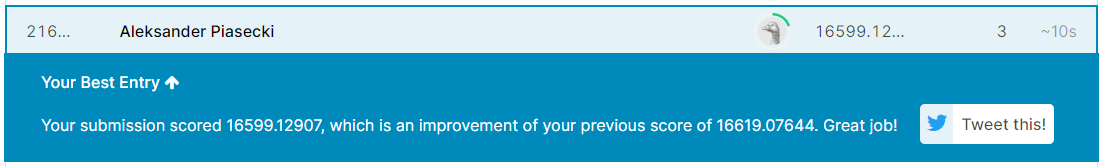

# Keep going

With missing value handling and categorical encoding, your modeling process is getting complex. This complexity gets worse when you want to save your model to use in the future. The key to managing this complexity is something called **pipelines**. 

**[Learn to use pipelines](https://www.kaggle.com/alexisbcook/pipelines)** to preprocess datasets with categorical variables, missing values and any other messiness your data throws at you.

---




*Have questions or comments? Visit the [Learn Discussion forum](https://www.kaggle.com/learn-forum/161289) to chat with other Learners.*